In [1]:
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Get data, 数据增强，在5-1中筛选了数据进行补充，其余作为测试数据

In [2]:
data = np.load('./databygroup.npy',allow_pickle=True).tolist()
#聚类筛选的数据，从step5-1中直接复制
#selected_dataid = ['historydata', 'sub2', 'sub3', 'sub4', 'sub5', 'sub6', 'sub7', 'sub8', 'sub9', 
#                   'sub10', 'sub11', 'sub12', 'sub13', 'sub14', 'sub17', 'sub18', 'sub19', 'sub21', 
#                   'sub22', 'sub23', 'sub24', 'sub25', 'sub26', 'sub27', 'sub28', 'sub30', 'sub31', 
#                   'sub32', 'sub33', 'sub35', 'sub36', 'sub37', 'sub39', 'sub41', 'sub42', 'sub44', 
#                   'sub45', 'sub46', 'sub47', 'sub48', 'sub49', 'sub50', 'sub51', 'sub52', 'sub53', 
#                   'sub54', 'sub56', 'sub58', 'sub59', 'sub61', 'sub62', 'sub63', 'sub65', 'sub66', 
#                   'sub67', 'sub68', 'sub69', 'sub70', 'sub71', 'sub73', 'sub74']
selected_dataid = ['historydata', 'sub3', 'sub4', 'sub5', 'sub8', 'sub9', 'sub11', 'sub12', 'sub14', 
                   'sub19', 'sub21', 'sub24', 'sub25', 'sub26', 'sub31', 'sub35', 'sub37', 'sub39', 
                   'sub41', 'sub42', 'sub44', 'sub46', 'sub47', 'sub49', 'sub51', 'sub52', 'sub53', 
                   'sub56', 'sub58', 'sub59', 'sub61', 'sub63', 'sub68', 'sub70', 'sub73', 'sub74']

# 因为all data采用前0.8，所以这个部分选数据sub57之后都不用选
#selected_dataid = ['historydata', 'sub3', 'sub4', 'sub5', 'sub8', 'sub9', 'sub11', 'sub12', 'sub14', 
#                   'sub19', 'sub21', 'sub24', 'sub25', 'sub26', 'sub31', 'sub35', 'sub37', 'sub39', 
#                   'sub41', 'sub42', 'sub44', 'sub46', 'sub47', 'sub49', 'sub51', 'sub52', 'sub53', 
#                   'sub56', 'sub58']


TrainData,TestData={},{}
for k in data.keys():
    #TrainData[k]=data[k]
    TestData[k]=data[k]

for k in data.keys():
    if k in selected_dataid:
        TrainData[k]=data[k]
        
#Tdata=TrainData[TrainData.keys()]
step=20
xtrain,ytrain=[],[]
for k in TrainData.keys():
    for i in range(TrainData[k].shape[0]-step-1):
        xtrain.append(TrainData[k][i:i+step,:TrainData[k].shape[1]-5].reshape(-1,1).tolist())
        ytrain.append(TrainData[k][i+1+step,[-5,-4,-3,-2,-1]].reshape(-1,1).tolist())
    #xtrain.append(xtem)
    #ytrain.append(ytem)
xtrain = np.array(xtrain).squeeze()
ytrain = np.array(ytrain).squeeze()

print(TrainData.keys())
print(xtrain.shape)

dict_keys(['historydata', 'sub3', 'sub4', 'sub5', 'sub8', 'sub9', 'sub11', 'sub12', 'sub14', 'sub19', 'sub21', 'sub24', 'sub25', 'sub26', 'sub31', 'sub35', 'sub37', 'sub39', 'sub41', 'sub42', 'sub44', 'sub46', 'sub47', 'sub49', 'sub51', 'sub52', 'sub53', 'sub56', 'sub58', 'sub59', 'sub61', 'sub63', 'sub68', 'sub70', 'sub73', 'sub74'])
(23032, 300)


In [ ]:
#ind = np.random.randint(0,xtrain.shape[0],int(xtrain.shape[0]*0.7))
#print(ind.shape)
#np.save('./0.7alldata.npy',ind)

# XGBoost

In [3]:
reg_mod = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=7,
    gamma=0,
)

mask = np.ones(xtrain.shape[0], dtype=bool)
ind = np.load('./0.7alldata.npy').tolist()
mask[ind] = False

xt, yt = xtrain[ind], ytrain[ind]
xv, yv = xtrain[mask], ytrain[mask]

eval_set = [(xt, yt), (xv, yv)]
reg_mod.fit(xt, yt, eval_set=eval_set, verbose=False)

mse = reg_mod.evals_result()['validation_0']['rmse']
vmse = reg_mod.evals_result()['validation_1']['rmse']

np.save('./XGBoost_mse.npy',mse)
np.save('./XGBoost_vmse.npy',vmse) 

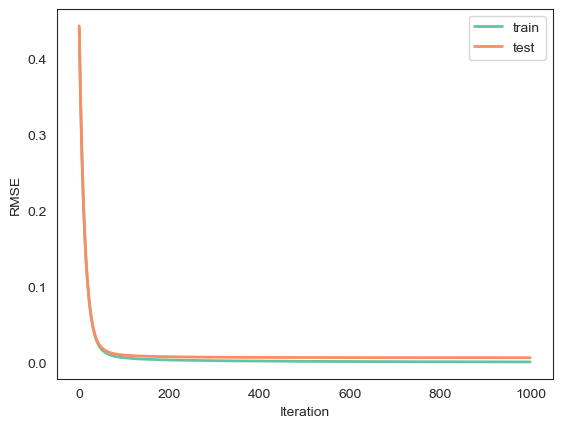

In [4]:
sns.set_style("white")
palette = sns.color_palette("Set2", n_colors=2) 

plt.plot(reg_mod.evals_result()['validation_0']['rmse'], label='train', color=palette[0], linewidth=2)
plt.plot(reg_mod.evals_result()['validation_1']['rmse'], label='test', color=palette[1], linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()